# Text Classification

    1. Data (Text) Preprocessing:
        • Lower Case
        • Remove links
        • Remove next lines (\n)
        • Words containing numbers
        • Extra spaces
        • Special characters
        • Removal of stop words
        • Stemming
        • Lemmatization
    2. Featuring Engineering:
        • Convert the Text corpus to a matrix of word counts. (Vectorize the Text data)
            Eg: Use Tf-IDF
    3. Model Building:
        1. Divide the dataset in to Train (70%), Test (20%) and Validation (10%) datasets.
        2. Build at least 3 classification models
            Step 1: Build model 1 and generate the classification report (Performance metrics using Confusion
            Metrics) for both Training and Test datasets.
            Step 2:
                • Use grid search or binary search for Hyperparameter Tuning.
                • Use atleast 2 values for each hyperparameters.
                • Choose the best model parameters based on grid search and generate the classification report
                (Performance metrics using Confusion Metrics) for both Training and Test datasets.
            Step 3: Repeat step 1 and 2 for Model 2 and Model 3 as well.
            Step 4: Now choose the final model based on the classification report (Performance metrics using
                    Confusion Metrics) for both Training, Test and validation datasets.

# Required Modules

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Defining Function for Data Preprocessing 

In [2]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = text.replace('\n', ' ')
    text = re.sub(r'\w*\d\w*', '', text)
    text = re.sub(' +', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    stemmer = PorterStemmer()
    text = ' '.join(stemmer.stem(word) for word in text.split())
    lemmatizer = WordNetLemmatizer()
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
    return text

# Loading dataset , performing data preprocessing and vectorizing process

In [3]:
corpus = pd.read_csv(r"F:\anu\infosys_internship\Emotions_training.csv")['text'].apply(preprocess_text)

tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(corpus)
y = pd.read_csv(r"F:\anu\infosys_internship\Emotions_training.csv")['label']

# Dividing dataset 

    Dividing data into 3 parts
    1.Training Data                                                                                                                 2.Testing Data                                                                                                                   3.Validation Data                                                                                                               In which the training data contains 70% of data ,testing data contains 20% and 10% of data is validation data 

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

# Buliding Classification model

In [5]:
def build_and_evaluate_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(model, param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    
    y_pred_val = best_model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_pred_val)
    
    print(classification_report(y_train, y_pred_train))
    print(classification_report(y_test, y_pred_test))
    print("Accuracy for Model - Training Set:", train_accuracy)
    print("Accuracy for Model - Test Set:", test_accuracy)
    print("Accuracy for Model - Validation Set:", val_accuracy)
    
    return best_model

    Here i am considering Multinomial Naive Bayes (MultinomialNB) model

In [6]:
#----------Model 1------------
nb_param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}
nb_model = MultinomialNB()
best_nb_model = build_and_evaluate_model(nb_model, nb_param_grid, X_train, y_train, X_test, y_test)
print(best_nb_model)

              precision    recall  f1-score   support

           0       0.89      0.98      0.94      3232
           1       0.88      0.98      0.93      3781
           2       0.99      0.64      0.78       870
           3       0.98      0.88      0.93      1552
           4       0.96      0.87      0.91      1371
           5       1.00      0.52      0.68       394

    accuracy                           0.91     11200
   macro avg       0.95      0.81      0.86     11200
weighted avg       0.92      0.91      0.91     11200

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       946
           1       0.68      0.91      0.78      1073
           2       0.76      0.26      0.38       296
           3       0.79      0.60      0.68       399
           4       0.84      0.59      0.70       380
           5       0.77      0.08      0.15       122

    accuracy                           0.73      3216
   macro avg       0.76

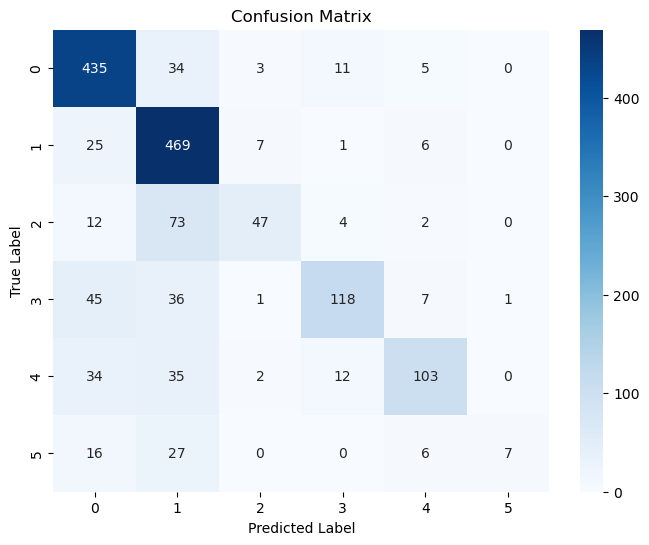

In [8]:
# Create a confusion matrix
y_pred_val = best_nb_model.predict(X_val)
cm = confusion_matrix(y_val, y_pred_val)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

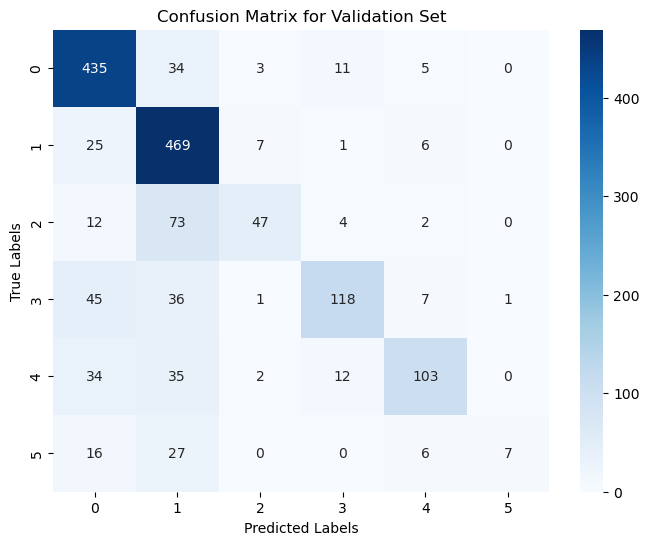

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_pred_val)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for Validation Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Conclusion

    Training Accuracy: High training accuracy (91.19%) indicates that the model performs well on the training set.
    Test Accuracy: Lower test accuracy (73.07%) compared to the training accuracy.
    Validation Accuracy: Similar validation accuracy (74.43%) to test accuracy.
    By building Multinomial Naive Bayes (MultinomialNB)